In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
import time

In [2]:
dataset = pd.read_csv('UmbilicalBest5Gini.csv')
X = dataset.iloc[:, 0: 5].values
y = dataset.iloc[:, 5].values

In [3]:
X


array([[ 0.44523846,  0.50507548, -0.8203834 ,  0.99599137,  0.03206902],
       [ 0.49850391,  0.43943053, -0.54283052,  0.93116979,  0.55064165],
       [ 0.51006219,  0.43943053, -0.54283052,  0.93116979,  0.55064165],
       [ 0.23914908,  0.46359512, -0.74453335,  0.99758387,  0.01932903],
       [ 0.34837365,  0.46423814, -0.59976013,  0.95138251,  0.38893994],
       [ 0.29340886,  0.47961438, -0.81564268,  0.99696181,  0.02430556],
       [ 0.31843841,  0.68588678, -0.51884416,  0.99205684,  0.06354525],
       [ 0.2503858 ,  0.54385695, -0.64052588,  0.96461749,  0.28306011],
       [ 0.27836786,  0.47520273, -0.64336912,  0.95351259,  0.3718993 ],
       [ 0.23973924,  0.49590607, -0.45708245,  0.93365445,  0.53076436],
       [ 0.34981142,  0.46148849, -0.74421339,  0.99563327,  0.03493383],
       [ 0.35508254,  0.47238161, -0.77205452,  0.99714516,  0.02283873],
       [ 0.30852275,  0.53084415, -0.47175027,  0.92517934,  0.59856528],
       [ 0.50645073,  0.42781277, -0.4

In [4]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0,stratify=y)


In [11]:
y_train

array([3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1], dtype=int64)

In [6]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [8]:
y_pred_test = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

#perhitungan akurasi, precision, recall (TEST)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_score(y_test, y_pred_test, average=None)
recall_score(y_test, y_pred_test, average=None)
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

from sklearn.metrics import classification_report

target_names = ['1', '2', '3']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

           1       0.93      0.96      0.95        27
           2       1.00      1.00      1.00         9
           3       0.00      0.00      0.00         2

    accuracy                           0.92        38
   macro avg       0.64      0.65      0.65        38
weighted avg       0.90      0.92      0.91        38



In [10]:
cm

array([[26,  0,  1],
       [ 0,  9,  0],
       [ 2,  0,  0]], dtype=int64)

In [11]:
from sklearn.tree import export_graphviz

In [12]:
export_graphviz(classifier, 'tree.dot')

In [13]:
! dot -Tpng tree.dot -o tree.png

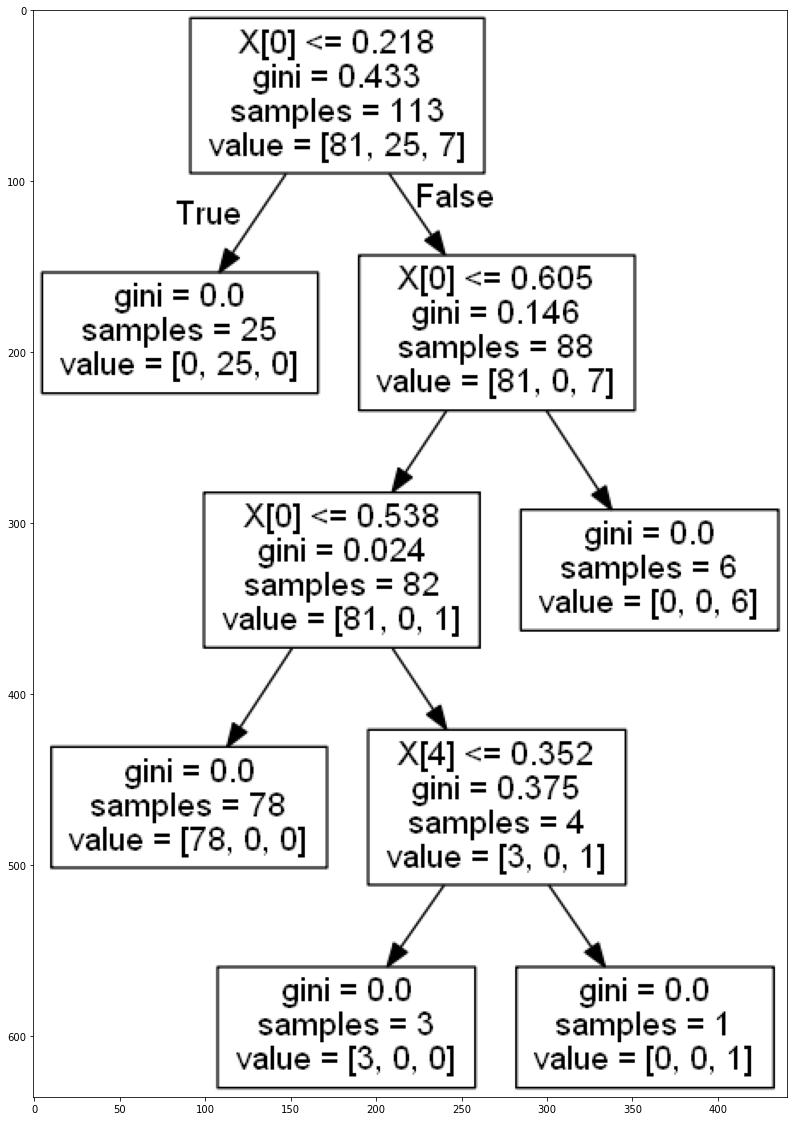

In [15]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)